In [1]:
from pathlib import Path
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import string
import scipy.constants

#own modules
from evaluation.utils import db, tools
from evaluation.processing import tools_ec
from evaluation.visualization import plot

# specific functions for study
general_funcs = tools.import_from_path('general_funcs', r'../general_funcs.py')

'done'

'done'

# Data

In [2]:
exp_ec, data_ec, exp_icpms, data_icpms, data_stability \
        = db.get_exp_sfc_icpms(sql_ec='''SELECT *
                                         FROM exp_ec_expanded
                                         WHERE name_user = "n.roettcher"
                                             AND DATE(t_start__timestamp) IN ("2024-03-26","2024-04-03","2024-04-04")
                                             AND comment = 'act+SGEIS'
                                             AND name_setup_sfc_alias = "Sandwitch"
                                             AND id_sample = 179 # equals loading__mg_Ir_cm2 > 1.6 but loading is added later
                                             ;''',
                               add_data_stability_analysis=True,  
                               add_gravimetric=True
                              )
exp_ec.loc[exp_ec.fe_bottom_id_pump_out == 2, 'icpms_location'] = 'top'
exp_ec.loc[exp_ec.fe_bottom_id_pump_out == 3, 'icpms_location'] = 'bottom'


with db.connect().begin() as con:
    data_eis = exp_ec.dataset.get_data(con,'data_eis_analysis').rename(columns={'id_data_eis':'id_data_ec',
                                                                            'E_dc__VvsRE': 'E_WE_raw__VvsRE',
                                                                             'I_dc__A': 'I__A'})
data_ec = pd.concat([data_ec, data_eis]).sort_index()


Link selected experiments to PublicationExport:  HTE09_hCCM_setup
 For table exp_sfc : inserted new experiments = 0 , skipped existing experiments = 76 
SELECT id_exp_sfc, t_start__timestamp,t_end__timestamp, id_exp_icpms, spots_spot_size__mm2, fc_top_name_flow_cell_A_opening_ideal__mm2, fc_top_name_flow_cell_A_opening_real__mm2, fc_top_id_sealing_A_opening__mm2, fc_top_id_PTL_A_PTL__mm2, fc_bottom_name_flow_cell_A_opening_ideal__mm2, fc_bottom_name_flow_cell_A_opening_real__mm2, fc_bottom_id_sealing_A_opening__mm2, fc_bottom_id_PTL_A_PTL__mm2  FROM match_exp_sfc_exp_icpms m   
           WHERE (id_exp_sfc)   IN (13352, 13353, 13354, 13355, 13356, 13357, 13358, 13359, 13360, 13361, 13362, 13363, 13364, 13365, 13366, 13367, 13368, 13369, 13370, 12858, 12859, 12860, 12861, 12862, 12863, 12864, 12865, 12866, 12867, 12868, 12869, 12870, 12871, 12872, 12873, 12874, 12875, 12876, 13035, 13036, 13037, 13038, 13039, 13040, 13041, 13042, 13043, 13044, 13045, 13046, 13047, 13048, 13049, 13050, 1

/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/processing/tools_ec.py:964: UserWarning: Column: "j__mA_cm2geo_active_chosen" not available in data_ec. Will be skipped.
  warnings.warn(f'Column: "{col}" not available in data_ec. Will be skipped.')


Done in  0:00:00.040313


# sfig:dissolution_profile_top_bottom_act_polcurve_Ir_Ti_ratio_share


SELECT id_exp_sfc, t_start__timestamp,t_end__timestamp, id_exp_icpms, spots_spot_size__mm2  FROM match_exp_sfc_exp_icpms m   
           WHERE (id_exp_sfc)   IN (13352, 13353, 13354, 13355, 13356, 13357, 13358, 13359, 13360, 13361, 13362, 13363, 13364, 13365, 13366, 13367, 13368, 13369, 13370, 12858, 12859, 12860, 12861, 12862, 12863, 12864, 12865, 12866, 12867, 12868, 12869, 12870, 12871, 12872, 12873, 12874, 12875, 12876, 13035, 13036, 13037, 13038, 13039, 13040, 13041, 13042, 13043, 13044, 13045, 13046, 13047, 13048, 13049, 13050, 13051, 13052, 13053, 13410, 13411, 13412, 13413, 13414, 13415, 13416, 13417, 13418, 13419, 13420, 13421, 13422, 13423, 13424, 13425, 13426, 13427, 13428);
Added snychronized timestamp column:  Timestamp_synchronized__s
Added snychronized timestamp column:  t_delaycorrected__timestamp_sfc_pc_synchronized__s
 green: A single value per group. 
 orange: Different values within the group --> stored as list. 


Different number of datapoints averaged, check avg_counts column in data dataframe.
   Number of experiments averaged: [2 1]
 green: A single value per group. 
 orange: Different values within the group --> stored as list. 


,id_spot,icpms_location,id_exp_sfc,name_user,name_setup_sfc,name_setup_sfc_alias,name_setup_sfc_feature,name_setup_sfc_type,t_start__timestamp,t_end__timestamp,rawdata_path,rawdata_computer,id_ML,id_ML_technique,force__N,linaxis_x__mm,linaxis_y__mm,linaxis_z__mm,T_stage__degC,interrupted,labview_sfc_version,db_version,comment,ec_name_technique,ec_R_u__ohm,ec_iR_corr_in_situ__percent,ec_R_u_postdetermined__ohm,ec_R_u_determining_exp_ec,ec_R_u_determining_updated,ec_E_RE__VvsRHE,ec_name_RE,ec_name_RE_material,ec_name_RE_manufacturer,ec_name_RE_model,ec_name_CE,ec_name_CE_material,ec_name_CE_manufacturer,ec_name_CE_model,ec_name_CE_comment,ec_name_device,ec_id_control_mode,ec_id_ie_range,ec_id_vch_range,ec_id_ich_range,ec_id_vch_filter,ec_id_ich_filter,ec_id_ca_speed,ec_id_ie_stability,ec_id_sampling_mode,ec_ie_range_auto,ec_vch_range_auto,ec_ich_range_auto,samples_id_sample,samples_name_sample,samples_name_user,samples_t_manufactured__timestamp,samples_comment,samples_total_loading__mg_cm2,spots_id_spot,spots_spot_size__mm2,spots_pos_x__mm,spots_pos_y__mm,spots_comment,spots_total_loading__mg_cm2,spots_m_CL__mg,spots_m_Decal_plus_CL__mg,spots_m_Decal__mg,cv_name_technique,cv_E_initial__VvsRE,cv_E_apex1__VvsRE,cv_E_apex2__VvsRE,cv_E_final__VvsRE,cv_scanrate__mV_s,cv_stepsize__mV,cv_cycles,cv_E_initial__VvsOCP,cv_E_apex1__VvsOCP,cv_E_apex2__VvsOCP,cv_E_final__VvsOCP,geis_name_technique,geis_f_initial__Hz,geis_f_final__Hz,geis_I_dc__A,geis_I_amplitude__A,geis_R_initialguess__ohm,geis_points_per_decade,ghold_name_technique,ghold_I_hold__A,ghold_t_hold__s,ghold_t_samplerate__s,gpulse_name_technique,gpulse_I_hold1__A,gpulse_I_hold2__A,gpulse_t_hold1__s,gpulse_t_hold2__s,gpulse_t_samplerate__s,gpulse_cycles,ocp_name_technique,ocp_t_hold__s,ocp_t_samplerate__s,peis_name_technique,peis_f_initial__Hz,peis_f_final__Hz,peis_E_dc__VvsRE,peis_E_amplitude__VvsRE,peis_R_initialguess__ohm,peis_points_per_decade,peis_E_dc__VvsOCP,phold_name_technique,phold_E_hold__VvsRE,phold_t_hold__s,phold_t_samplerate__s,phold_E_hold__VvsOCP,ppulse_name_technique,ppulse_E_hold1__VvsRE,ppulse_E_hold2__VvsRE,ppulse_t_hold1__s,ppulse_t_hold2__s,ppulse_t_samplerate__s,ppulse_cycles,ppulse_E_hold1__VvsOCP,ppulse_E_hold2__VvsOCP,ramp_name_technique,ramp_E_initial__VvsRE,ramp_E_final__VvsRE,ramp_scanrate__mV_s,ramp_stepsize__mV,ramp_cycles,ramp_E_initial__VvsOCP,ramp_E_final__VvsOCP,fc_top_name_flow_cell,fc_top_name_flow_cell_name_user,fc_top_name_flow_cell_material,fc_top_name_flow_cell_A_opening_ideal__mm2,fc_top_name_flow_cell_A_opening_real__mm2,fc_top_name_flow_cell_manufacture_date,fc_top_name_flow_cell_CAD_file,fc_top_name_flow_cell_opening_shape,fc_top_name_flow_cell_comment,fc_top_id_sealing,fc_top_id_sealing_name_user,fc_top_id_sealing_material,fc_top_id_sealing_A_sealing__mm2,fc_top_id_sealing_A_opening__mm2,fc_top_id_sealing_thickness__mm,fc_top_id_sealing_shaping_method,fc_top_id_sealing_comment,fc_top_id_PTL,fc_top_id_PTL_name_user,fc_top_id_PTL_material,fc_top_id_PTL_thickness__mm,fc_top_id_PTL_manufacturer,fc_top_id_PTL_A_PTL__mm2,fc_top_id_PTL_shaping_method,fc_top_id_PTL_comment,fc_bottom_name_flow_cell,fc_bottom_name_flow_cell_name_user,fc_bottom_name_flow_cell_material,fc_bottom_name_flow_cell_A_opening_ideal__mm2,fc_bottom_name_flow_cell_A_opening_real__mm2,fc_bottom_name_flow_cell_manufacture_date,fc_bottom_name_flow_cell_CAD_file,fc_bottom_name_flow_cell_opening_shape,fc_bottom_name_flow_cell_comment,fc_bottom_id_sealing,fc_bottom_id_sealing_name_user,fc_bottom_id_sealing_material,fc_bottom_id_sealing_A_sealing__mm2,fc_bottom_id_sealing_A_opening__mm2,fc_bottom_id_sealing_thickness__mm,fc_bottom_id_sealing_shaping_method,fc_bottom_id_sealing_comment,fc_bottom_id_PTL,fc_bottom_id_PTL_name_user,fc_bottom_id_PTL_material,fc_bottom_id_PTL_thickness__mm,fc_bottom_id_PTL_manufacturer,fc_bottom_id_PTL_A_PTL__mm2,fc_bottom_id_PTL_shaping_method,fc_bottom_id_PTL_comment,fe_top_id_pump_in,fe_top_id_pump_in_manufacturer,fe_top_id_pump_in_model,fe_top_id_p

Different number of datapoints averaged, check avg_counts column in data dataframe.
   Number of experiments averaged: [3 2 1]


/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2052: UserWarning: y-axis label is overwritten from $j_\mathrm{geo}$ / mA cm$_{(\mathrm{bottom\ PTL})}^{-2}$ to j__mA_cm2geo_fc_bottom_PTL_min
  warnings.warn(
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2052: UserWarning: y-axis label is overwritten from dm_dt_S__ng_s_cm2geo_fc_bottom_PTL_background_corrected_min to d$m$ d$t^{-1}$ $S^{-1}$ /
ng s$^{-1}$ cm$^{-2}$
  warnings.warn(
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2052: UserWarning: y-axis label is overwritten from dm_dt_S__ng_s_cm2geo_fc_bottom_PTL_background_corrected_min to d$m$ d$t^{-1}$ $S^{-1}$ /
ng s$^{-1}$ cm$^{-2}$
  warnings.warn(
/home/hte_admin/sciebo/jupyter/shared/04_modules/evaluation/visualization/plot.py:2052: UserWarning: y-axis label is overwritten from dm_dt_S__ng_s_cm2geo_fc_bottom_PTL_background_corrected_min to d$m$ d$t^{-1}$ $S^{-1}$ /
ng s$^{-1}$

AxesSubplot(0.225,0.586667;0.75x0.130293)
AxesSubplot(0.225,0.788187;0.75x0.0651466)
AxesSubplot(0.225,0.186667;0.75x0.130293)
AxesSubplot(0.225,0.32;0.75x0.130293)
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
 File  sfig_dis_pro_top_bottom_act_polcurve_Ir_Ti_ratio_share.pdf  already exists 


Overwrite?
	0: False
	1: True
Your choice:  1


 Plot  sfig_dis_pro_top_bottom_act_polcurve_Ir_Ti_ratio_share.pdf  successfully saved 
![[Binder_export/Figures/Fig_S5/sfig_dis_pro_top_bottom_act_polcurve_Ir_Ti_ratio_share.pdf]] <br> *jupyter notebook source:* ![[Binder_export/Figures/Fig_S5/$$dummy_replaced_by_obsidian_jupyter$$]]


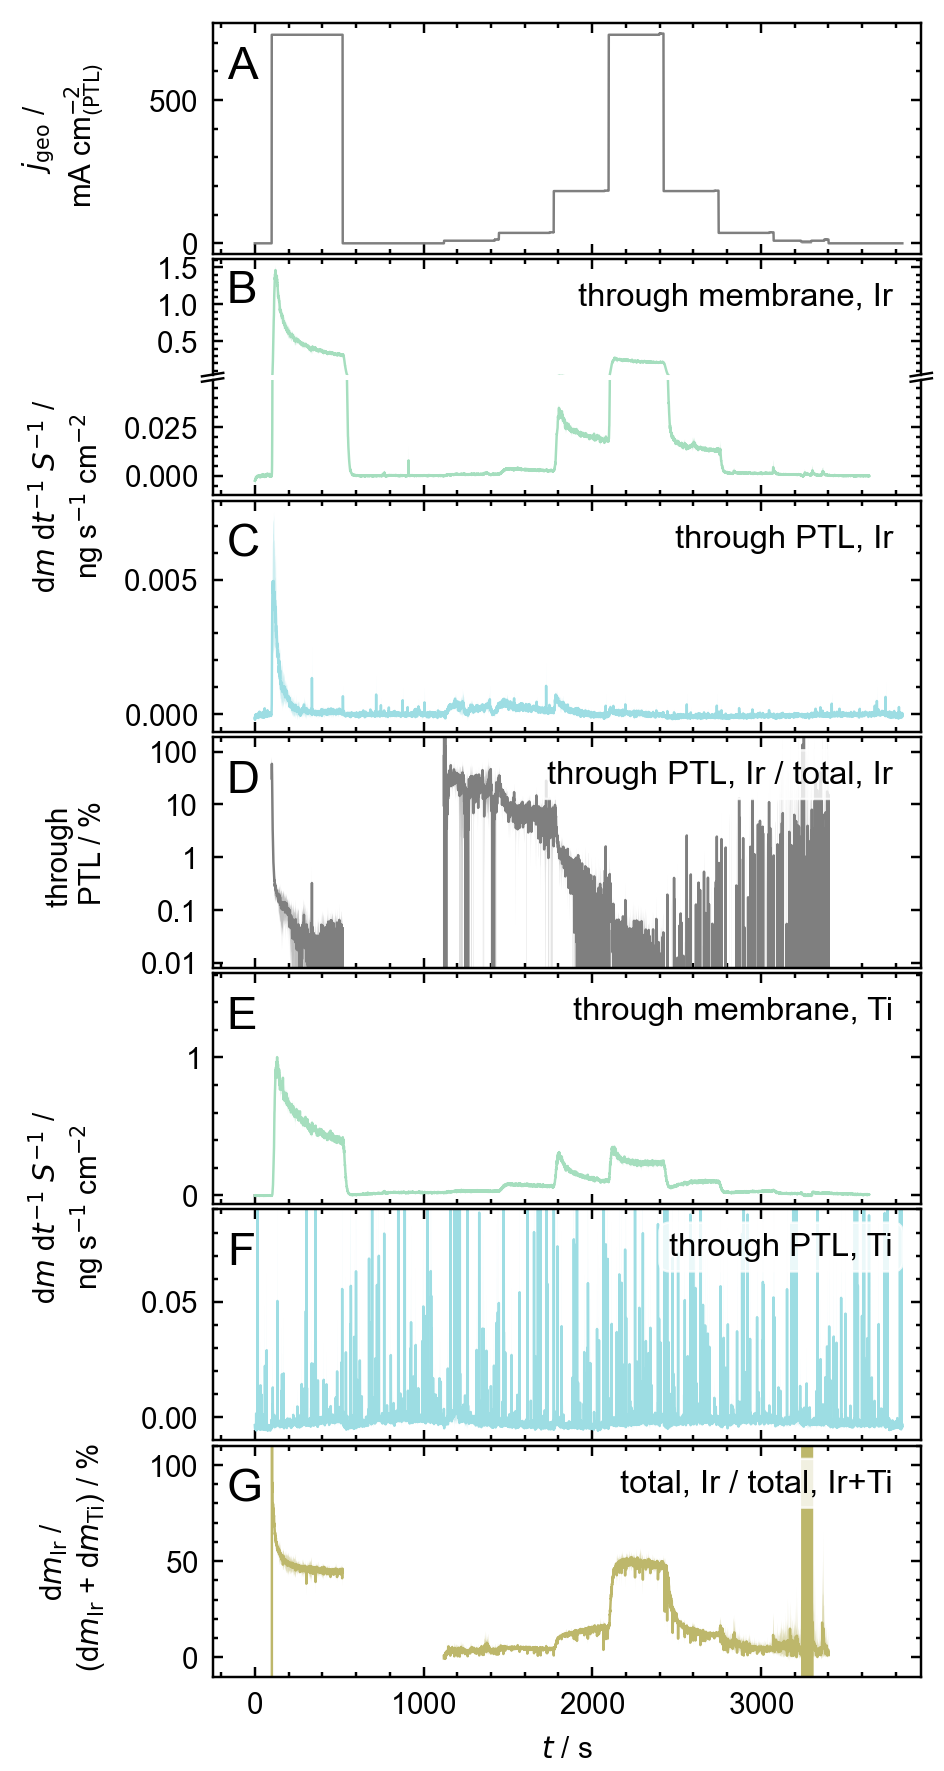

In [3]:
exp_ec.loc[exp_ec.fe_bottom_id_pump_out == 2, 'icpms_location'] = 'top'
exp_ec.loc[exp_ec.fe_bottom_id_pump_out == 3, 'icpms_location'] = 'bottom'

overlay_cols =  ['id_sample', 'id_spot', 'icpms_location']
cols_ec_to_icpms=['loading__mg_Ir_cm2', 'ec_name_technique'] 
name = 'act+SGEIS'
plot_name='sfig_dis_pro_top_bottom_act_polcurve_Ir_Ti_ratio_share'
x_lim=None
time_shift__s=0
alpha=False

icpms_x_col='t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s'
icpms_y_col = 'dm_dt_S__ng_s_cm2geo_fc_bottom_PTL'
icpms_y_cols_background_correction = [icpms_y_col,]

    
if plot_name is None:
    plot_name = name

if type(cols_ec_to_icpms) != list:
    cols_ec_to_icpms = [cols_ec_to_icpms]

    
exp_ec_overlay, data_ec_overlay, exp_icpms_overlay, data_icpms_overlay  \
        = db.overlay_exp_sfc_icpms(exp_ec, data_ec, exp_icpms, data_icpms,
                                   overlay_cols=overlay_cols,
                                   cols_ec_to_icpms=cols_ec_to_icpms
                                  )

## correct time sync for length of first technique (different for different MLs)
first_exp_ec_technique = exp_ec_overlay.groupby(overlay_cols).first()
time_diff_first_exp_ec_technique= first_exp_ec_technique.t_end__timestamp - first_exp_ec_technique.t_start__timestamp
time_correct_exp_ec = time_diff_first_exp_ec_technique - time_diff_first_exp_ec_technique.min()
time_correct_exp_ec.name='Timestamp_correction__timediff'
data_ec_overlay.loc[:, 'Timestamp_synchronized_corrected__s'] = data_ec_overlay.Timestamp_synchronized__s - data_ec_overlay.join(time_correct_exp_ec, ).Timestamp_correction__timediff.dt.seconds
data_icpms_overlay.loc[:, 't_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s'] = data_icpms_overlay.t_delaycorrected__timestamp_sfc_pc_synchronized__s - data_icpms_overlay.join(time_correct_exp_ec, ).Timestamp_correction__timediff.dt.seconds
data_icpms_overlay.loc[:, 'dm_dt__pg_s'] = data_icpms_overlay.dm_dt__ng_s *1000

## add column is_during_ocp
data_icpms_overlay.loc[:, 'is_during_ocp'] = data_icpms_overlay.id_exp_sfc.isin(exp_ec.loc[exp_ec.ec_name_technique == 'exp_ec_ocp', :].index)



#def avg_timeshift(exp_ec_overlay, data_ec_overlay, exp_icpms_overlay, data_icpms_overlay, time_shift__s=time_shift__s):
# shifting top timestamp - assuming too late rise in counts due to diffusion broadening during delay time
# shift time of top measurement
# remove all data points below 0s (averaging and calculation of ratio will be performed on number of data points assuming time is synced so ignoring actual timestamp)
data_icpms_overlay.loc[data_icpms_overlay.index.get_level_values(level='icpms_location') == 'top', 
                                't_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s'] += time_shift__s
data_icpms_overlay = data_icpms_overlay.loc[(data_icpms_overlay.t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s > 0 ), :]



exp_ec_overlay = exp_ec_overlay.loc[ ~(exp_ec_overlay.index.get_level_values('id_spot').isin([10]))]
data_ec_overlay = data_ec_overlay.loc[data_ec_overlay.reset_index(level=-1).index.isin(exp_ec_overlay.index)]



######
# Baseline correction for Iridium 
####
for icpms_y_col_background_correction in icpms_y_cols_background_correction:
    data_icpms_overlay, icpms_y_col_background, icpms_y_col_background_corrected\
            = general_funcs.background_correction(
                  icpms_x_col=icpms_x_col,
                  icpms_y_col=icpms_y_col_background_correction,
                  data_icpms_overlay=data_icpms_overlay,
                  y_col_background='_background',
                  y_col_background_corrected='_background_corrected',
                  #debug=True,
                  )
data_icpms_overlay.loc[lambda row: row.index.get_level_values('name_isotope_analyte')=='Ti47', icpms_y_col_background_corrected] = data_icpms_overlay.loc[lambda row: row.index.get_level_values('name_isotope_analyte')=='Ti47', icpms_y_col] 
### baseline correction finished



exp_icpms_overlay_avg, data_icpms_overlay_avg = plot.average(exp_icpms_overlay,
                                                        data_icpms_overlay, 
                                                        on=['name_isotope_analyte', 'name_isotope_internalstandard','id_sample', 'icpms_location'],
                                                        overlay_index_cols=[ 'id_spot', ],
                                                       average_cols_by_dtypes=[np.float64, bool],
                                                        )
exp_ec_overlay_avg, data_ec_overlay_avg = plot.average(exp_ec_overlay,
                                                        data_ec_overlay, 
                                                       on=['id_sample'],
                                                        overlay_index_cols=[ 'id_spot', ],
                                                       )


# Derive ratio
data_icpms_overlay_avg_top_bottom = data_icpms_overlay_avg.loc[data_icpms_overlay_avg.index.get_level_values('icpms_location')=='top']\
                                                            .reset_index(level='icpms_location')\
                                                            .join(data_icpms_overlay_avg.loc[data_icpms_overlay_avg.index.get_level_values('icpms_location')=='bottom']\
                                                                                        .reset_index(level='icpms_location'), 
                                                                  lsuffix='_top', 
                                                                  rsuffix='_bottom')
for col in [icpms_y_col, icpms_y_col_background_corrected]:
    data_icpms_overlay_avg_top_bottom.loc[:, col+'_bottom__percent'] = (1 / (1 + (data_icpms_overlay_avg_top_bottom[col+'_top'] / data_icpms_overlay_avg_top_bottom[col+'_bottom'])) * 100)
    data_icpms_overlay_avg_top_bottom.loc[:, col+'_bottom__percent_max'] = (1 / (1 + (data_icpms_overlay_avg_top_bottom[col+'_min_top'] / data_icpms_overlay_avg_top_bottom[col+'_max_bottom'])) * 100)
    data_icpms_overlay_avg_top_bottom.loc[:, col+'_bottom__percent_min'] = (1 / (1 + (data_icpms_overlay_avg_top_bottom[col+'_max_top'] / data_icpms_overlay_avg_top_bottom[col+'_min_bottom'])) * 100)

    # display no data during ocp
    data_icpms_overlay_avg_top_bottom.loc[data_icpms_overlay_avg_top_bottom.is_during_ocp_top == True, col+'_bottom__percent'] = np.nan
    data_icpms_overlay_avg_top_bottom.loc[data_icpms_overlay_avg_top_bottom.is_during_ocp_top == True, col+'_bottom__percent_max'] = np.nan
    data_icpms_overlay_avg_top_bottom.loc[data_icpms_overlay_avg_top_bottom.is_during_ocp_top == True, col+'_bottom__percent_min'] = np.nan


exp_icpms_overlay_avg_top_bottom = exp_icpms_overlay_avg.loc[exp_icpms_overlay_avg.index.get_level_values('icpms_location')=='top']\
                                                        .reset_index(level='icpms_location')

plot.manual_col_to_axis_label['dm_dt_S__ng_s_cm2geo_fc_bottom_PTL'] = 'd$m$ d$t^{-1}$ $S^{-1}$ /\nng s$^{-1}$ cm$^{-2}_{\mathrm{(PTL)}}$'
plot.manual_col_to_axis_label['t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s'] = '$t$ / s' #_{(\\mathrm{bottom\\ PTL})}
plot.manual_col_to_axis_label['dm_dt_S__ng_s_cm2geo_fc_bottom_PTL_background_corrected'] = 'd$m$ d$t^{-1}$ $S^{-1}$ /\nng s$^{-1}$ cm$^{-2}$' #_{(\\mathrm{bottom\\ PTL})}



with plt.rc_context(plot.get_style(style='singleColumn',
                                  increase_fig_height=3,
                                   add_margins= {'left': 0.8,},
                                   add_margins_between_subplots={'hspace':0.2},
                                  interactive =True,)):
    plot_storage = plot.PlotDataStorage(plot_name, overwrite_existing=True)

    fig = plt.figure()
    height_ratios=[1,.5,.5,1,1,1,1,1]
    gs = gridspec.GridSpec(8, 1, height_ratios=height_ratios)
    ax1 = fig.add_subplot(gs[0, 0])
    ax3 = fig.add_subplot(gs[1, 0], sharex=ax1)
    ax_Ir_top_inset = fig.add_subplot(gs[2, 0], sharex=ax1) 
    ax4 = fig.add_subplot(gs[3, 0], sharex=ax1)
    ax_ratio_Ir = fig.add_subplot(gs[4, 0], sharex=ax1)

    ax5 = fig.add_subplot(gs[5, 0], sharex=ax1)
    ax6 = fig.add_subplot(gs[6, 0], sharex=ax1)
    ax7 = fig.add_subplot(gs[7, 0], sharex=ax1)

    axs = [ax1,ax3,ax4,ax_ratio_Ir,ax5,ax6, ax7]

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax_Ir_top_inset.get_xticklabels(), visible=False)


    
    plot.combine_broken_axes(ax_top_left=ax3 ,
                ax_bottom_right=ax_Ir_top_inset,
                broken_ratio= height_ratios[2]/height_ratios[1],
                broken_axis='y',
               )
    ax3_upper_lower = plot.add_empty_subplot(fig, gs[1:3, 0])

    ax3_4 = plot.add_empty_subplot(fig, gs[1:4, 0])
    ax5_6 = plot.add_empty_subplot(fig, gs[5:7, 0])

    overlay_cols=['id_sample', 'icpms_location']
    df_color = exp_ec_overlay.reset_index().loc[:, overlay_cols].drop_duplicates() 

    df_color = df_color.dataset.add_column('color', 
                                            rowindexers=[                                                             
                                                        ((df_color.id_sample == 179) & (df_color.icpms_location == 'top')),
                                                        ((df_color.id_sample == 179) & (df_color.icpms_location == 'bottom')),
                                                        (df_color.id_sample == 180),
                                                         (df_color.id_sample == 181),
                                                        ],
                                            values=['#a5debeff',
                                                    '#9ddde3ff',
                                                    'Purples', 
                                                    'YlOrBr'],
                                       cmap_min=0.3, cmap_max=0.7,)\
                                    .return_dataset()\
                                    .set_index(overlay_cols).loc[:, ['color', ]]

   
    exp_ec_overlay_avg = exp_ec_overlay_avg\
                    .dataset\
    .add_column('color', 
                                 values='tab:grey',  cmap_min=0.3, cmap_max=0.7,
                                )\
                    .add_column('label', 
                                 values=exp_ec_overlay_avg.loading__mg_Ir_cm2.apply(lambda x: '{0:.1f}'.format(x)).astype(str)+' mg$_{\mathrm{Ir}}$ cm$^{-2}$',
                                rowindexer_first_of_group='id_sample',
                                )\
                    .plot(x_col='Timestamp_synchronized_corrected__s',
                         y_col='j__mA_cm2geo_fc_bottom_PTL',
                         ax=ax1,
                         data=data_ec_overlay_avg,   
                    )\
                    .fill_between(x_col='Timestamp_synchronized_corrected__s',
                                  y_col='j__mA_cm2geo_fc_bottom_PTL'+'_min',
                                  y2_col='j__mA_cm2geo_fc_bottom_PTL'+'_max',
                                  data=data_ec_overlay_avg,
                                  ax=ax1,
                                  alpha=0.5,
                                  label='',
                                  linewidth=0,
                                 )\
     .return_dataset()


    exp_icpms_overlay_avg = exp_icpms_overlay_avg.join(df_color, on=overlay_cols)\
                    .dataset\
                    .add_column('label', 
                                         values=exp_icpms_overlay_avg.index.get_level_values('icpms_location'), #.loading__mg_Ir_cm2.apply(lambda x: '{0:.1f}'.format(x)).astype(str)+' mg$_{\mathrm{Ir}}$ cm$^{-2}$',#(exp_icpms_overlay.index.get_level_values('id_sample').astype(str)+', spot '+exp_icpms_overlay.index.get_level_values('id_spot').astype(str)),
                                        rowindexer_first_of_group='icpms_location'
                                        )\
                     .add_column('ax_col', 
                                 rowindexers=[((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ir193') & (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'top')),
                                              ((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ti47')& (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'top')),
                                              ((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ir193') & (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'bottom')),
                                              ((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ti47')& (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'bottom')),
                                             ],
                                 values=[ax3, 
                                         ax5, 
                                         ax4,
                                         ax6
                                        ])\
                    .fill_between(x_col='t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s',
                                  y_col=icpms_y_col_background_corrected+'_min',
                                  y2_col=icpms_y_col_background_corrected+'_max',
                                  data=data_icpms_overlay_avg,
                                  ax='ax_col',
                                  alpha=0.5,
                                  label='',
                                  linewidth=0,
                             )\
                    .plot(x_col='t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s',
                         y_col=icpms_y_col_background_corrected,
                          ax='ax_col',
                         data=data_icpms_overlay_avg,
                    )\
                    .return_dataset()
  
    exp_icpms_overlay_avg_Ir_top = exp_icpms_overlay_avg.loc[((exp_icpms_overlay_avg.index.get_level_values('name_isotope_analyte') == 'Ir193')
                                                              & (exp_icpms_overlay_avg.index.get_level_values('icpms_location') == 'top')
                                                             )]
    
    exp_icpms_overlay_avg_Ir_top = exp_icpms_overlay_avg_Ir_top.dataset\
                    .fill_between(x_col='t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s',
                                  y_col=icpms_y_col_background_corrected+'_min',
                                  y2_col=icpms_y_col_background_corrected+'_max',
                                  data=data_icpms_overlay_avg,
                                  ax=ax_Ir_top_inset,
                                  alpha=0.5,
                                  label='',
                                  linewidth=0,
                                  axlabel_auto=False,

                             )\
                    .plot(x_col='t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s',
                         y_col=icpms_y_col_background_corrected,
                          ax=ax_Ir_top_inset,
                         data=data_icpms_overlay_avg,   
                    )\
                    .return_dataset()
 
    exp_icpms_overlay_avg_top_bottom = exp_icpms_overlay_avg_top_bottom.loc[exp_icpms_overlay_avg_top_bottom.index.get_level_values('name_isotope_analyte')=='Ir193', :]

    exp_icpms_overlay_avg_top_bottom = exp_icpms_overlay_avg_top_bottom\
            .dataset\
            .add_column('ax_col', 
                       values=[ax_ratio_Ir, ],
                       rowindexers=[(exp_icpms_overlay_avg_top_bottom.index.get_level_values('name_isotope_analyte') == 'Ir193'), ]
                       )\
            .plot(x_col='t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s_top',
                  y_col=icpms_y_col_background_corrected+'_bottom__percent',
                  ax='ax_col',
                  data=data_icpms_overlay_avg_top_bottom,
                  color='tab:grey',
                  label='',
            )\
            .fill_between(x_col='t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s_top',
                              y_col=icpms_y_col_background_corrected+'_bottom__percent_max',
                          y2_col=icpms_y_col_background_corrected+'_bottom__percent_min',
                              data=data_icpms_overlay_avg_top_bottom,
                            ax='ax_col',
                              color='tab:grey',
                                      alpha=0.5,
                              label='',
                                  linewidth=0,
                             )\
            .return_dataset()
    ax_ratio_Ir.set_yscale('log')


    data_icpms_overlay_avg_top_bottom_Ir_Ti = data_icpms_overlay_avg_top_bottom.loc[['Ir193', ], :].join(data_icpms_overlay_avg_top_bottom.loc[['Ti47', ], :].reset_index().set_index('id_data_overlay'), 
                                                                                                    on='id_data_overlay',
                                                                                                    lsuffix='_Ir',
                                                                                                    rsuffix='_Ti',
                                                                                                   )
    data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, 'dm_dt_Ir_to_total__percent'] = \
        ((data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_top_Ir'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_bottom_Ir']) 
         / (data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_top_Ir'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_bottom_Ir'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col+'_top_Ti'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col+'_bottom_Ti']))\
        *100
    data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, 'dm_dt_Ir_to_total__percent_max'] = \
        ((data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_max_top_Ir'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_max_bottom_Ir']) 
         / (data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_max_top_Ir'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_max_bottom_Ir'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col+'_min_top_Ti'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col+'_min_bottom_Ti']))\
        *100
    data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, 'dm_dt_Ir_to_total__percent_min'] = \
        ((data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_min_top_Ir'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_min_bottom_Ir']) 
         / (data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_min_top_Ir'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col_background_corrected+'_min_bottom_Ir'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col+'_max_top_Ti'] + data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[:, icpms_y_col+'_max_bottom_Ti']))\
        *100


    data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[data_icpms_overlay_avg_top_bottom_Ir_Ti.is_during_ocp_top_Ir == True, 'dm_dt_Ir_to_total__percent'] = np.nan
    data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[data_icpms_overlay_avg_top_bottom_Ir_Ti.is_during_ocp_top_Ir == True, 'dm_dt_Ir_to_total__percent_min'] = np.nan
    data_icpms_overlay_avg_top_bottom_Ir_Ti.loc[data_icpms_overlay_avg_top_bottom_Ir_Ti.is_during_ocp_top_Ir == True, 'dm_dt_Ir_to_total__percent_max'] = np.nan
    ax7.plot('t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s_top_Ir',
             'dm_dt_Ir_to_total__percent',
             data=data_icpms_overlay_avg_top_bottom_Ir_Ti,
             color='darkkhaki',
              label='',
            )
    ax7.fill_between(x='t_delaycorrected__timestamp_sfc_pc_synchronized_corrected__s_top_Ir',
             y1='dm_dt_Ir_to_total__percent_min',
             y2='dm_dt_Ir_to_total__percent_max',
             data=data_icpms_overlay_avg_top_bottom_Ir_Ti,
             color='darkkhaki',
             alpha=0.5,
             label='',
             linewidth=0,
            )

    icpms_text = {'top': 'through membrane',
                 'bottom': 'through PTL',}
    text_label_pos = 0.96, 0.9
    text_label_style = dict(
                         ha='right', # this doesn't work properly for interactive plot rendering
                         va='top',
                         bbox=dict(boxstyle="round",
                                   ec=(1., 1, 1, 0.8),
                                   fc=(1., 1, 1, 0.8),
                                   ),
                           )
    
    for index, row in exp_icpms_overlay_avg.reset_index().loc[:, ['ax_col', 'icpms_location', 'analyte_element']].drop_duplicates().iterrows():
        print(row.ax_col)
        ax = row.ax_col if row.ax_col != ax3 else ax3_upper_lower
        ax.text(*text_label_pos, 
                icpms_text[row.icpms_location] + ', ' + row.analyte_element,  
                transform=ax.transAxes, 
                **text_label_style,
               )
    ax_ratio_Ir.text(*text_label_pos, 
            'through PTL, Ir / total, Ir',
            transform=ax_ratio_Ir.transAxes, 
            **text_label_style,)
    ax7.text(*text_label_pos, 
            'total, Ir / total, Ir+Ti',
            transform=ax7.transAxes, 
            **text_label_style,)  
    # Plot labels
    plot_labels = list(string.ascii_uppercase)[:len(axs)]

    for ax, plot_label in zip(axs, plot_labels):
        ax.text(0.02, 0.9, plot_label, 
                    horizontalalignment='left', 
                    verticalalignment='top', 
                    transform=ax.transAxes,
                    fontsize=11)

    ax_ratio_Ir.legend(loc='upper right', bbox_to_anchor=(1.0, 0.78))

    ax1.set_ylabel('$j_\mathrm{geo}$ /\n mA cm$_{(\mathrm{PTL})}^{-2}$')
    
    ax3_4.set_ylabel(ax3.get_ylabel())
    ax5_6.set_ylabel(ax5.get_ylabel())
    ax3.set_ylabel('')
    ax_Ir_top_inset.set_ylabel('')
    ax_Ir_top_inset.set_xlabel('')
    ax4.set_ylabel('')
    ax5.set_ylabel('')
    ax6.set_ylabel('')
    ax7.set_ylabel('d$m_\mathrm{Ir}$ / \n (d$m_\mathrm{Ir}$ + d$m_\mathrm{Ti}$) / %')

    ax_ratio_Ir.set_ylabel('through \nPTL / %')
    
    ax_Ir_top_inset.set_ylim([-0.01, 0.049])
    ax3.set_ylim([0.049, ax3.get_ylim()[1]])
    
    ax5.set_ylim([ax5.get_ylim()[0], ax3.get_ylim()[1]])
    ax6.set_ylim([-0.01, 0.09])
    ax7.set_ylim([-10, 110])
    ax1.set_xlim([-250, 3950])

    if x_lim is not None:
        ax4.set_xlim(x_lim) 

    ax_ratio_Ir.set_ylim([0.008, 190])

    y_min, y_max = ax_ratio_Ir.get_ylim()
    # Calculate the range of orders of magnitude
    min_order = np.floor(np.log10(y_min))+1
    max_order = np.ceil(np.log10(y_max))-1

    # Create ticks based on the order of magnitude
    ticks = np.logspace(min_order, max_order, num=int(max_order - min_order) + 1)
    print(ticks)
    # Set the y-ticks to one label for each order of magnitude
    ax_ratio_Ir.set_yticks(ticks)
    ax_ratio_Ir.set_yticklabels([("%.3f" %tick).rstrip('0').rstrip('.') for tick in ticks])


    for ax in axs[:-1]:
        ax.set_xlabel('')
        plt.setp(ax.get_xticklabels(), visible=False)
    axs[-1].set_xlabel('$t$ / s')

    fig.align_ylabels(axs+ [ax3_4, ax5_6])
    plot_storage.export(fig, plot_format='pdf')

    plt.show()